In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def joukowsky(x_cent,y_cent,radius):
    #circle parameters definition
    center = np.array([x_cent,y_cent])
    radius1 = radius
    
    #circle coordinates calculations
    angle = np.linspace(0,2*np.pi,720)
    chi1 = center[0] + radius1*np.cos(angle)
    eta1 = center[1] + radius1*np.sin(angle)

#     fig, ax = plt.subplots()
#     ax.axis('equal')
#     ax.plot(chi1,eta1,'g',label='Circle1')
#     ax.plot(chi2,eta2,'b',label='Circle2')
#     ax.scatter(center[0],center[1],s=100,c='k',marker='x',label='Center')
#     ax.scatter([-1,1],[0,0],c=['r','r'],s=100,marker='h',label='Reference Points')
#     ax.set_xlabel(r"$\chi$",size=14)
#     ax.set_ylabel(r"$\eta$",size=14)
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    x1 = ((chi1)*(chi1**2+eta1**2+1))/(chi1**2+eta1**2)
    y1 = ((eta1)*(chi1**2+eta1**2-1))/(chi1**2+eta1**2)

#     fig, ax = plt.subplots()
#     ax.axis('equal')
#     ax.plot(x1,y1,'g',label='Transform1')
#     ax.plot(x2,y2,'b',label='Transform2')
#     ax.set_xlabel(r"$x$",size=14)
#     ax.set_ylabel(r"$y$",size=14)
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.figure(figsize=(10,10))

    plt.subplot(1, 2, 1)
    plt.plot(chi1,eta1,'g',label='Circle1')
    plt.scatter(center[0],center[1],s=100,c='k',marker='x',label='Center')
    plt.scatter([-1,1],[0,0],c=['r','r'],s=100,marker='h',label='Reference Points')
    plt.axis('equal')
    plt.xlim([-3,3])
    plt.grid(True)
    plt.xlabel(r"$\chi$",size=14)
    plt.ylabel(r"$\eta$",size=14)
    plt.legend(loc='center left', bbox_to_anchor=(0.12, 0.1))

    plt.subplot(1, 2, 2)
    plt.axis('equal')
    plt.xlim([3,-3])
    plt.plot(x1,y1,'g',label='Transform1')

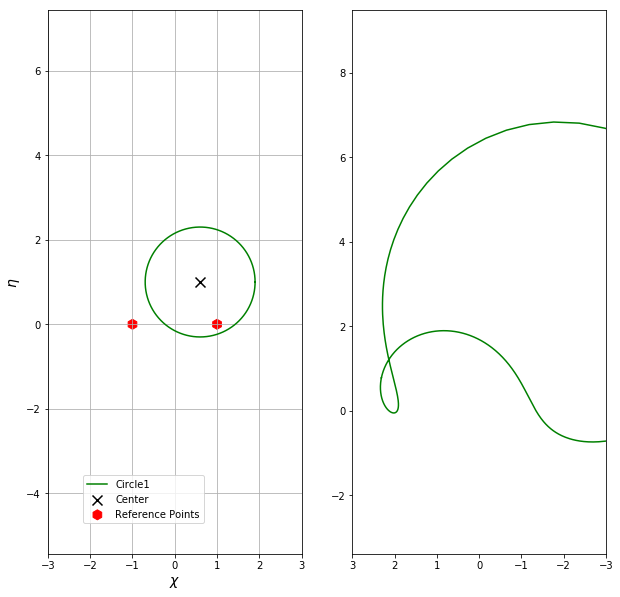

In [4]:
joukowsky(0.6,1,1.3)

## Code for interactive script

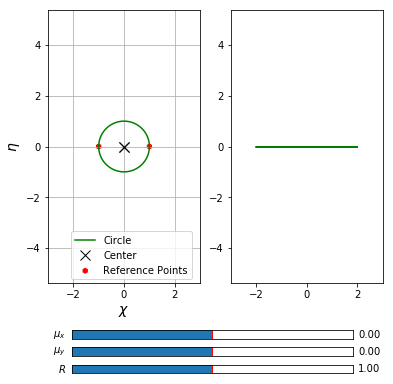

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

x_cent = 0
y_cent = 0
radius1 = 1

#circle parameters definition
center = np.array([x_cent,y_cent])

#circle coordinates calculations
angle = np.linspace(0,2*np.pi,720)
chi1 = center[0] + radius1*np.cos(angle)
eta1 = center[1] + radius1*np.sin(angle)

x1 = ((chi1)*(chi1**2+eta1**2+1))/(chi1**2+eta1**2)
y1 = ((eta1)*(chi1**2+eta1**2-1))/(chi1**2+eta1**2)
	
fig, ax = plt.subplots(figsize=(6,6))
plt.subplots_adjust(bottom=0.25)

plt.subplot(1, 2, 1)
l, = plt.plot(chi1,eta1,'g',label='Circle')
m, = plt.plot([center[0],center[0]],[center[1],center[1]],'w',marker='x',mec='k',markersize=10,label='Center')
plt.scatter([-1,1],[0,0],c=['r','r'],s=25,marker='h',label='Reference Points')
plt.axis('equal')
plt.xlim([-3,3])
plt.grid(True)
plt.xlabel(r"$\chi$",size=14)
plt.ylabel(r"$\eta$",size=14)
plt.legend(loc='center left', bbox_to_anchor=(0.12, 0.1))

plt.subplot(1, 2, 2)
plt.axis('equal')
plt.xlim([-3,3])
n, = plt.plot(x1,y1,'g')

x0 = 0
y0 = 0
r0 = 1

axx = plt.axes([0.18, 0.12, 0.65, 0.02], facecolor='white')
axy = plt.axes([0.18, 0.08, 0.65, 0.02], facecolor='white')
axr = plt.axes([0.18, 0.04, 0.65, 0.02], facecolor='white')

sx = Slider(axx, r"$\mu_x$", -1, 1, valinit=x0)
sy = Slider(axy, r"$\mu_y$", -1, 1, valinit=y0)
sr = Slider(axr, r"$R$", 0, 2, valinit=r0)

def update(val):
	x_cent = sx.val
	y_cent = sy.val
	radius1 = sr.val
	
	#circle parameters definition
	center = np.array([x_cent,y_cent])

	#circle coordinates calculations
	angle = np.linspace(0,2*np.pi,720)
	chi1 = center[0] + radius1*np.cos(angle)
	eta1 = center[1] + radius1*np.sin(angle)

	x1 = ((chi1)*(chi1**2+eta1**2+1))/(chi1**2+eta1**2)
	y1 = ((eta1)*(chi1**2+eta1**2-1))/(chi1**2+eta1**2)
	
	l.set_xdata(chi1)
	l.set_ydata(eta1)

	m.set_xdata([x_cent,x_cent])
	m.set_ydata([y_cent,y_cent])

	n.set_xdata(x1)
	n.set_ydata(y1)
	
	fig.canvas.draw_idle()
sx.on_changed(update)
sy.on_changed(update)
sr.on_changed(update)

plt.show()